In [48]:
from gensim.models import Word2Vec, KeyedVectors
import pandas as pd
import nltk
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv('dataG.csv', encoding="utf-8")
df = data.drop_duplicates()
#df.shape
data.shape


(1159, 7)

<AxesSubplot:xlabel='Sector'>

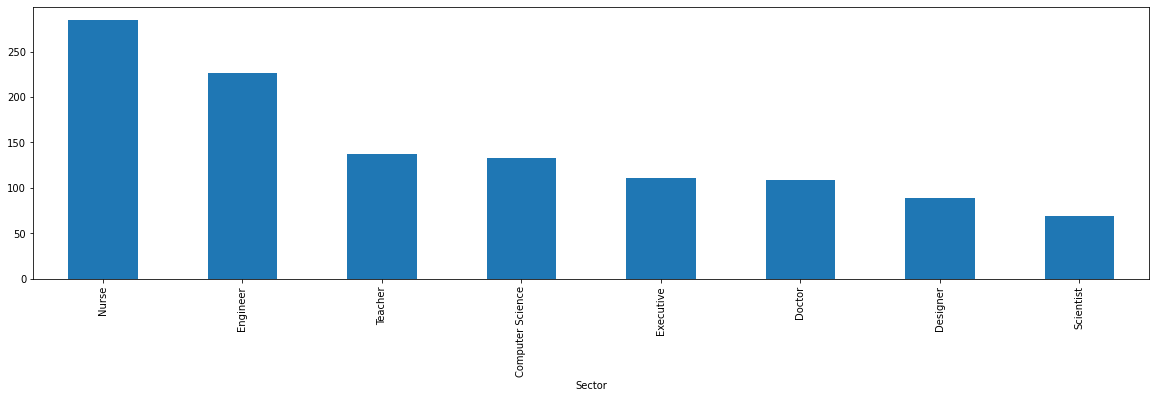

In [62]:
counts = df.groupby("Sector").count()["Title"].sort_values(ascending=False)[:20]
counts.plot(kind="bar",figsize=(20,5))

In [98]:
counts

Sector
Nurse               285
Engineer            226
Teacher             137
Computer Science    133
Executive           111
Doctor              109
Designer             89
Scientist            69
Name: Title, dtype: int64

In [64]:
loc_counts = df.groupby("Location").count()["Title"].sort_values(ascending=False)[:10]
loc_counts

Location
Sydney NSW                   198
Melbourne VIC                169
Brisbane QLD                  64
Australia                     46
Adelaide Region SA            46
Canberra ACT                  40
Newcastle NSW                 26
Perth WA                      24
Victoria                      17
Melbourne City Centre VIC     17
Name: Title, dtype: int64

In [17]:


data = pd.read_csv('dataG.csv', encoding="utf-8")


In [67]:
def format_salary(row):
    salary = row["Salary"]
    if "-" in salary:
        split = salary.split("-")
        salary_min = split[0]
        salary_max = split[1]
    else:
        salary_min = salary
        salary_max = salary
    row["salary_min"] = salary_min.replace("$","").replace("a month", "").replace("a year","").replace(",","")
    row["salary_max"] = salary_min.replace("$","").replace("a month", "").replace("a year","").replace(",","")
    
    if "month" in row["Salary"]:
        row["salary_min"] = int(row["salary_min"])*12
        row["salary_max"] = int(row["salary_max"])*12
        
    return row

df_salary = df[df["Salary"]!= "None"].dropna()
df_salary.apply(format_salary,axis=1)

df_salary["salary_min"] = pd.to_numeric(df_salary["salary_min"],'coerce')
df_salary["salary_max"] = pd.to_numeric(df_salary["salary_max"],'coerce')

df_salary["salary_min"].mean()

KeyError: 'salary_min'

In [68]:
def cleanData(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc if word.isalpha() and len(word) > 2]
    desc = [word for word in desc if word not in stop_words]
    return desc

In [70]:
import nltk 
from nltk import word_tokenize 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
tags_df = df["Description"].apply(cleanData)

In [81]:
from collections import Counter
result = tags_df.apply(Counter).sum().items()
result = sorted(result, key=lambda kv: kv[1],reverse=True)
result_series = pd.Series({k: v for k, v in result})

In [94]:
tags_df.head(10)
#df.head(10)

0    [role, working, within, mount, lofty, heights,...
1    [job, work, type, full, time, part, time, loca...
2    [kindness, care, respect, aveo, seeking, exper...
3    [reference, outstanding, candidates, encourage...
4    [position, summary, based, across, metro, adel...
5    [reference, fantastic, opportunity, registered...
6    [casual, position, competitive, hourly, rate, ...
7    [job, work, type, full, time, location, clayto...
8    [casual, opportunities, suit, lifestyle, great...
9    [employment, type, permanent, part, time, posi...
Name: Description, dtype: object

In [95]:
model = Word2Vec(tags_df, min_count=1, size=32)

In [97]:
model.most_similar('doctor')

/Users/carolinetvergaard/anaconda3/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('stream', 0.9914191961288452),
 ('nihg', 0.9854506850242615),
 ('drainage', 0.9854170083999634),
 ('num', 0.9849721193313599),
 ('surface', 0.9846711158752441),
 ('equipped', 0.9845851063728333),
 ('arc', 0.9845362901687622),
 ('covered', 0.98345547914505),
 ('intake', 0.9832008481025696),
 ('australasia', 0.9831146597862244)]

In [86]:
skills = ["strong", "experience", "compassion", "ambitious"]

<AxesSubplot:>

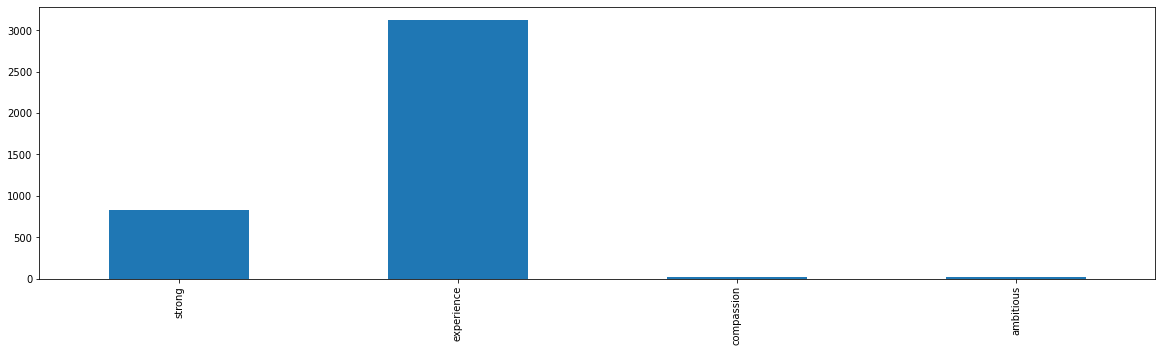

In [87]:
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar', figsize=(20,5))

In [92]:
####Word2Vec with Gensim - Python
#des = tags_df["Description"].values
tags_df.shape

(1159,)

In [4]:
nursedf = pd.read_csv('d10.csv')
engdf = pd.read_csv('e10.csv')
engdf.head(10)

,Unnamed: 0,Title,Location,Company,Salary,Description
0,1,Telecom Engineer- Multiple Roles,Sydney NSW,Teleaus,None,The Company\nTeleaus-a business of Serveno Aus...
1,2,"Guidance, Navigation & Control Engineer",Brisbane QLD,SKYBORNE TECHNOLOGIES,None,About Skyborne Technologies\nSkyborne Technolo...
2,3,Utilities Engineer (Water and Sewage),Corowa NSW,Federation Council,"$1,515 - $1,757 a week","Great Lifestyle, health & educational faciliti..."
3,4,Graduate Engineer - Electrical,Brisbane QLD,Hatch,None,With over six decades of business and technica...
4,5,Standards Engineer,Adelaide Region SA,Optimised Maintenance,None,About the role\nOptimised Maintenance is a Mai...
5,6,Continuous Improvement Engineer,Sydney NSW,Diageo,None,Job Description :\nDiageo is a global leader i...
6,7,Project Engineer,Pilbara WA,BHP,None,About BHP\nAt BHP we support our people to gro...
7,8,Engineer (Traffic),Brisbane QLD,Queensland Government,None,Accountabilities include(but are not limited t...
8,9,Civil Project Engineer - Confluence Water,Sydney NSW,Downer Group,None,Job ID: 574873\n\nJob type: Full Time - Perman...
9,10,Expression of Interest (EOI) Junior Engineer,Hobart TAS,Broad Construction,None,Job ID\n993098\nJob Type\nPermanent Full-time\...


In [46]:
import re
text = nursedf["Description"].decode('utf-8')
text = re.sub(r'[^\w\s]','',text)


AttributeError: 'Series' object has no attribute 'decode'

In [47]:
class(text)

SyntaxError: invalid syntax (<ipython-input-47-e7ee775e887f>, line 1)

In [41]:
import string


jb = data["Description"].values
#print(jb)


text = nursedf["Description"].values.decode('utf-8')
#text = text.lower()
#print(text)

#text_p = "".join([char for char in text if char not in string.punctuation])
print(text)


#engdf_des = engdf["Description"].values

["About the Role\nWorking within Mount Lofty Heights Nursing Home, you will provide comprehensive and empathetic nursing care to our aged care residents. You will exercise sound clinical judgement, critical thinking and understand how your contribution influences high quality outcomes for our health service. Approaching residents with open, honest communication you will build enduring relationships to ensure a high quality of service delivery. You will also have a commitment to continuous quality and service improvement and provide guidance and support to less experienced team members.\nWhy Darling Downs Health\nDarling Downs Health's region is a large geographic area covering approximately 90,000 square kilometres. We are one of the largest employers in the region, with a diverse team of more than 5,500 staff. We deliver frontline health services across our 29 facilities and treat more than 85,000 admissions to hospital, see greater than 158,000 people through our Emergency Department

In [6]:
jobdescriptions

len(list(jobdescriptions))

285

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/carolinetvergaard/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:

jobvec = [nltk.word_tokenize(Description) for Description in jobdescriptions if Description.isalnum()]
print(jobvec)

#jobveceng = [nltk.word_tokenize(Description) for Description in engdf_des]

[]


In [15]:
model = Word2Vec(jobvec, min_count = 1, size=32)
modeleng = Word2Vec(engdf_des, min_count=1, size=32)

In [16]:
model.most_similar('nurse')
#modeleng.most_similar('man')

/Users/carolinetvergaard/anaconda3/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('under', 0.9935131669044495),
 ('duties', 0.9925994873046875),
 ('works', 0.9908081293106079),
 ('closely', 0.990805447101593),
 ('possible', 0.9898067116737366),
 ('legal', 0.9897369742393494),
 ('reports', 0.9881137013435364),
 ('direction', 0.9878865480422974),
 ('specialty', 0.9875656962394714),
 ('extensive', 0.9868037104606628)]

In [18]:
####Word embedding models (Gensim) Youtube video 
import gensim, os, nltk

data = pd.read_csv('dataG.csv')

In [19]:
def filter_words(sentence):
    return [word.lower() for word in nltk.word_tokenize(sentence) if word.isalnum()]

def tokenize(text):
    return[filter_words(sentence) for sentence in nltk.sent_tokenize(text)]

In [28]:
sentences = sentences.extend(tokenize(jobdescriptions))

#text = data["Description"].values
#text = rf.read()
                #sentences.extend(tokenize(text))

#jobdescriptions = nursedf["Description"].values

#sentencevec = [nltk.word_tokenize(Description) for Description in jobdescriptions]


#sentences.extend(tokenize(text))
#model = gensim.models.Word2Vec(jobvec, min_count = 1, size=32)

TypeError: cannot use a string pattern on a bytes-like object